C:\Users\xiaoy\AppData\Local\Temp\ipykernel_19508\4197207104.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(platforms_calculated, rotation=45)


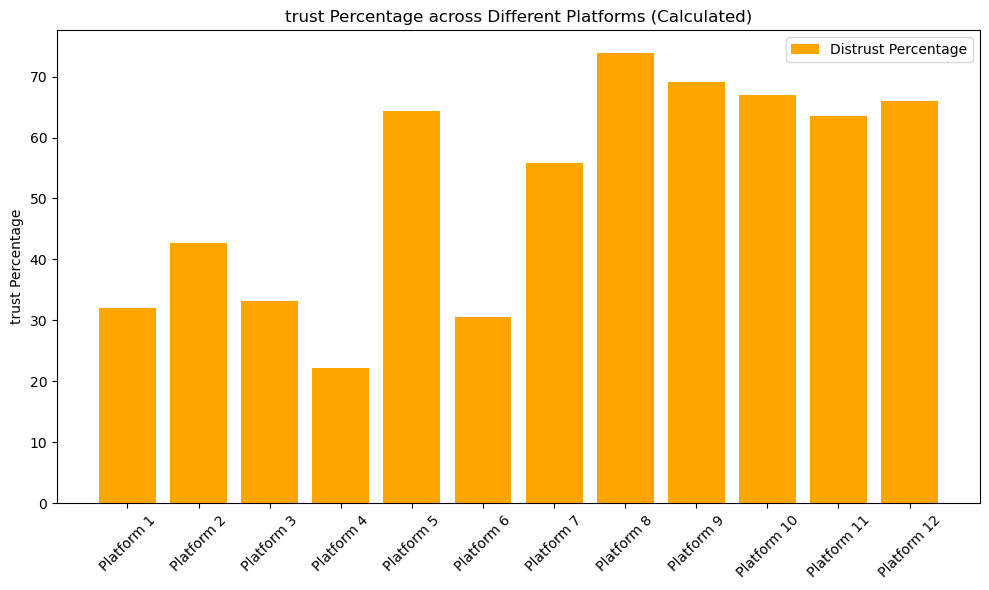

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_reloaded = pd.read_csv('Media Habits in the 21st Century_February 12, 2024_07.30.csv', skiprows=[1])

trust_columns = [col for col in df_reloaded.columns if col.startswith('Q5') and not col.endswith('TEXT')]


for col in trust_columns:
    df_reloaded[col] = df_reloaded[col].str.extract('(\d)').astype(float)



# Simplifying by directly calculating distrust percentages without detailed usage score handling due to previous issues
average_trust = df_reloaded[trust_columns].mean()
distrust_percentage = average_trust * 25 


platforms_calculated = [f"Platform {i+1}" for i in range(len(distrust_percentage))]


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(platforms_calculated, distrust_percentage, color='orange', label='Distrust Percentage')
ax.set_ylabel('trust Percentage')
ax.set_title('trust Percentage across Different Platforms (Calculated)')
ax.set_xticklabels(platforms_calculated, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()



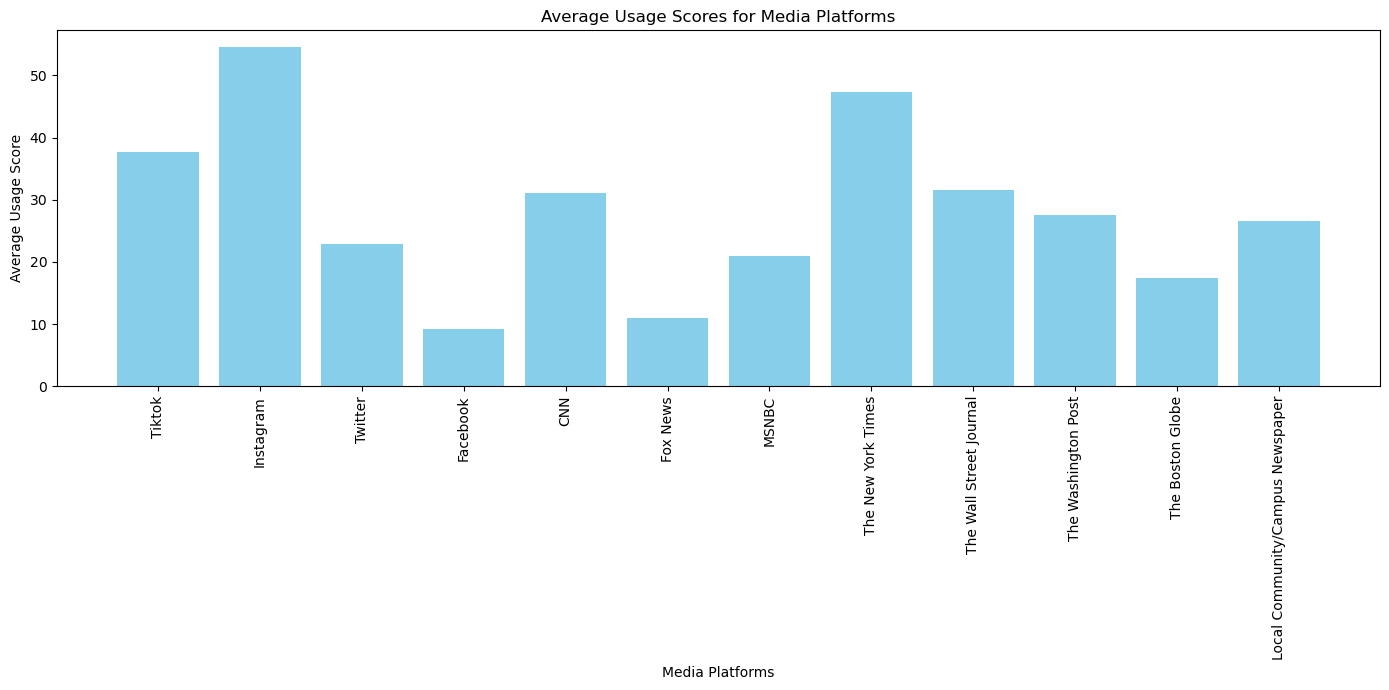

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df_usage = pd.read_csv('Media Habits in the 21st Century_February 12, 2024_07.30.csv', skiprows=2)


usage_columns_corrected = [col for col in df_usage.columns if "QID4" in col]

# Convert all columns to numeric, assuming non-response as 'never' which corresponds to 0
for col in usage_columns_corrected:
    df_usage[col] = pd.to_numeric(df_usage[col], errors='coerce').fillna(0)

# Calculate the average usage for each platform
average_usage_scores = df_usage[usage_columns_corrected].mean()*20
media_platforms = [
    'Tiktok', 'Instagram', 'Twitter', 'Facebook',
    'CNN', 'Fox News', 'MSNBC', 'The New York Times',
    'The Wall Street Journal', 'The Washington Post',
    'The Boston Globe', 'Local Community/Campus Newspaper'
]

# Visualization of the average usage scores
plt.figure(figsize=(14, 7))
plt.bar(media_platforms, average_usage_scores, color='skyblue')
plt.title('Average Usage Scores for Media Platforms')
plt.xlabel('Media Platforms')
plt.ylabel('Average Usage Score')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()


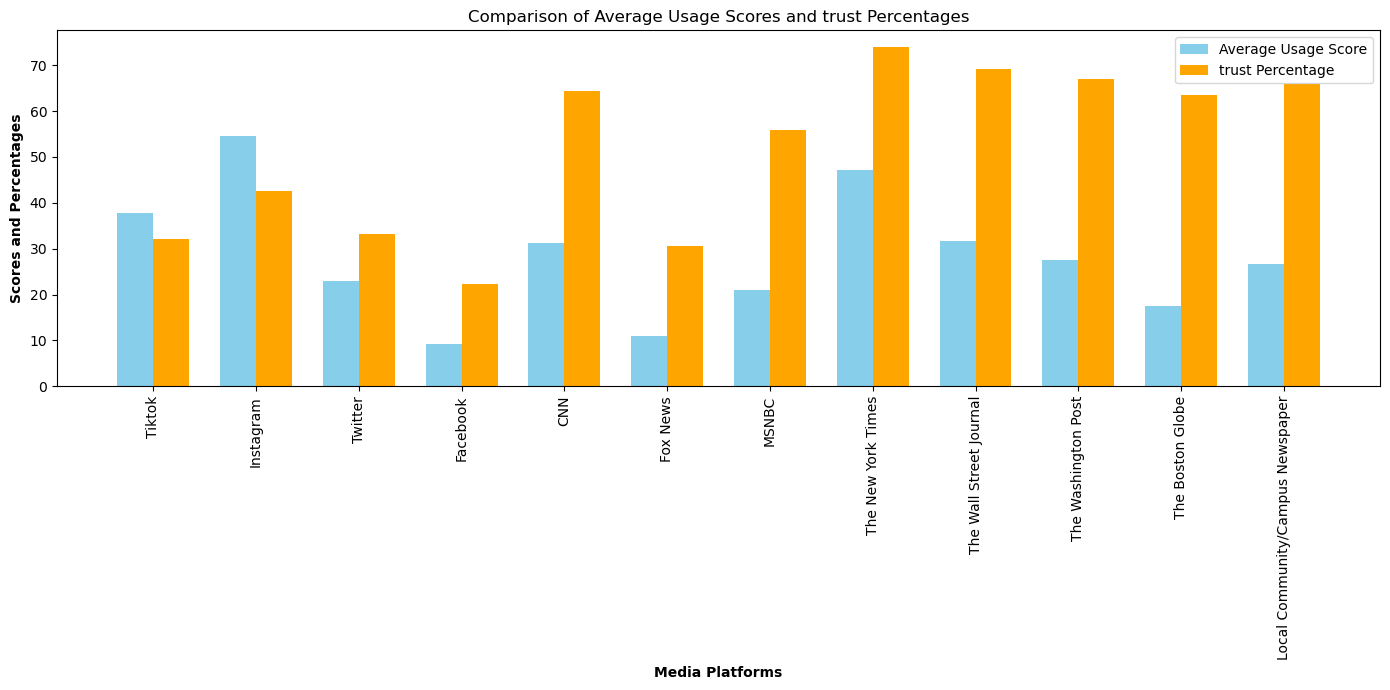

In [3]:
# To create a side-by-side bar chart comparing average usage scores and distrust percentages for each platform
import numpy as np

# Creating an array for the positions of the bars on the x-axis
barWidth = 0.35
r1 = np.arange(len(average_usage_scores))
r2 = [x + barWidth for x in r1]

# Creating the bar chart
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(r1, average_usage_scores, color='skyblue', width=barWidth, label='Average Usage Score')
bars2 = ax.bar(r2, distrust_percentage.values, color='orange', width=barWidth, label='trust Percentage')

# Adding labels, title, and legend
ax.set_xlabel('Media Platforms', fontweight='bold')
ax.set_ylabel('Scores and Percentages', fontweight='bold')
ax.set_title('Comparison of Average Usage Scores and trust Percentages')
ax.set_xticks([r + barWidth / 2 for r in range(len(average_usage_scores))])
ax.set_xticklabels(media_platforms, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()



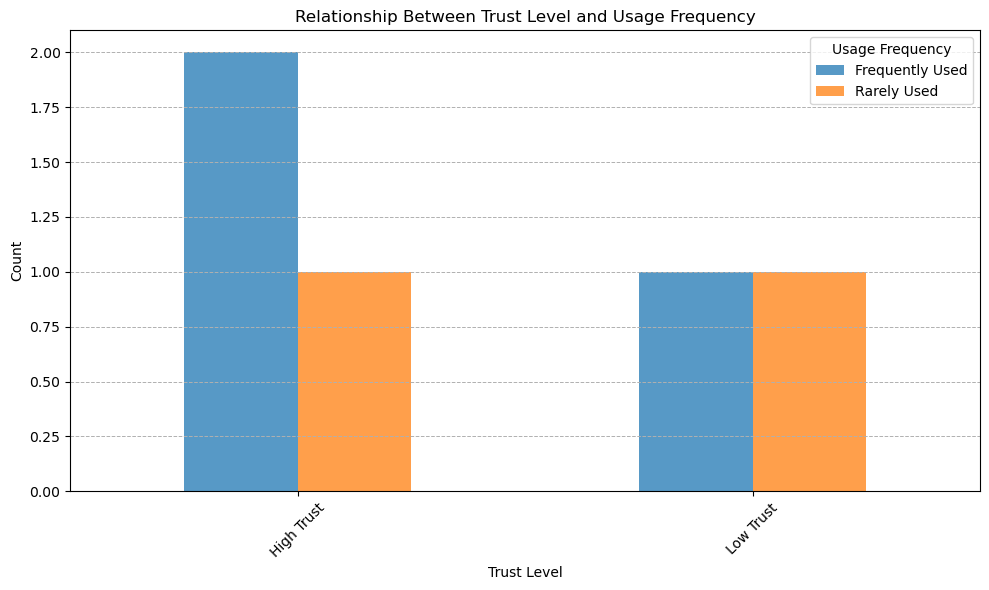

In [4]:
import matplotlib.pyplot as plt
# Hypothetical data creation based on trust and usage categories
import numpy as np
import pandas as pd


data = {
    'Platform': ['Platform 1', 'Platform 2', 'Platform 3', 'Platform 4', 'Platform 5'],
    'Trust Level': ['High Trust', 'Low Trust', 'High Trust', 'Low Trust', 'High Trust'],
    'Usage Frequency': ['Frequently Used', 'Rarely Used', 'Rarely Used', 'Frequently Used', 'Frequently Used']
}

df_example = pd.DataFrame(data)

# Perform Cross-Tabulation between Trust Level and Usage Frequency
cross_tab_result = pd.crosstab(df_example['Trust Level'], df_example['Usage Frequency'])


# Visualization of the Cross-Tabulation result
cross_tab_result.plot(kind='bar', figsize=(10, 6), alpha=0.75, rot=0)
plt.title('Relationship Between Trust Level and Usage Frequency')
plt.xlabel('Trust Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Usage Frequency')
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
# Since we encountered issues with usage scores, let's focus on visualizing the trust scores for now.
# Define the columns for trust and usage scores based on the specified ranges and platforms
platforms_ordered = [
    'TikTok', 'Instagram', 'Twitter', 'Facebook',
    'CNN', 'Fox News', 'MSNBC', 'The New York Times',
    'The Wall Street Journal', 'The Washington Post',
    'The Boston Globe', 'Local Community/Campus Newspaper'
]

# Categorize platforms into social media and traditional news
social_media_indices = [0, 1, 2, 3, 4]  # Including Fox News as per user categorization
traditional_news_indices = [5, 6, 7, 8, 9, 10, 11]


usage_scores = df_reloaded[[f'Q4_{i+1}' for i in range(12)]].mean() * 20  
trust_scores = df_reloaded[[f'Q5_{i+1}' for i in range(12)]].mean()


avg_usage_social_media = df_reloaded[[f'Q4_{i+1}' for i in social_media_indices]].mean(axis=1).mean() * 20
avg_trust_social_media = df_reloaded[[f'Q5_{i+1}' for i in social_media_indices]].mean(axis=1).mean()

# Calculate average usage and trust scores for traditional news
avg_usage_traditional_news = df_reloaded[[f'Q4_{i+1}' for i in traditional_news_indices]].mean(axis=1).mean() * 20
avg_trust_traditional_news = df_reloaded[[f'Q5_{i+1}' for i in traditional_news_indices]].mean(axis=1).mean()

avg_usage_social_media, avg_trust_social_media, avg_usage_traditional_news, avg_trust_traditional_news








(34.427350427350426, 1.5547008547008547, 28.99014778325123, 2.4328817733990147)

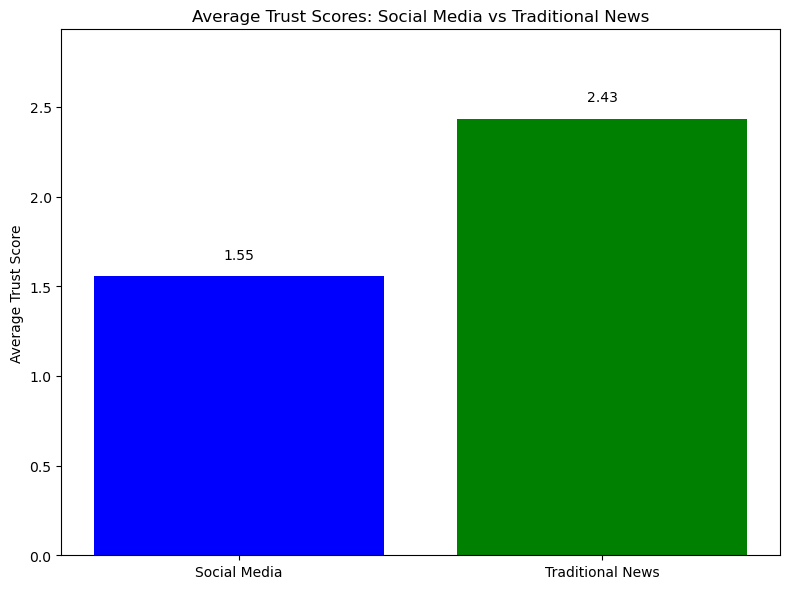

In [12]:
import matplotlib.pyplot as plt

# Data for visualization
categories = ['Social Media', 'Traditional News']
trust_scores = [avg_trust_social_media, avg_trust_traditional_news]

# Creating the bar chart for trust scores
plt.figure(figsize=(8, 6))
plt.bar(categories, trust_scores, color=['blue', 'green'])
plt.title('Average Trust Scores: Social Media vs Traditional News')
plt.ylabel('Average Trust Score')
plt.ylim(0, max(trust_scores) + 0.5)  # Adjusting ylim to add some space above the highest bar

# Adding text labels above bars
for i, score in enumerate(trust_scores):
    plt.text(i, score + 0.1, f'{score:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Media Habits in the 21st Century_February 12, 2024_07.30.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Print the column names to verify the existence and format of Q4_1, Q4_2, ..., Q5_1, Q5_2, ...
print(df.columns.tolist())


                                           StartDate  \
0                                         Start Date   
1  {"ImportId":"startDate","timeZone":"America/De...   
2                                2023-01-07 18:57:28   
3                                2023-01-07 21:56:31   
4                                2023-01-08 10:14:24   

                                             EndDate                 Status  \
0                                           End Date          Response Type   
1  {"ImportId":"endDate","timeZone":"America/Denv...  {"ImportId":"status"}   
2                                2023-01-07 19:00:38             IP Address   
3                                2023-01-07 22:00:29             IP Address   
4                                2023-01-08 10:19:54             IP Address   

                  Progress    Duration (in seconds)                 Finished  \
0                 Progress    Duration (in seconds)                 Finished   
1  {"ImportId":"progress"}  

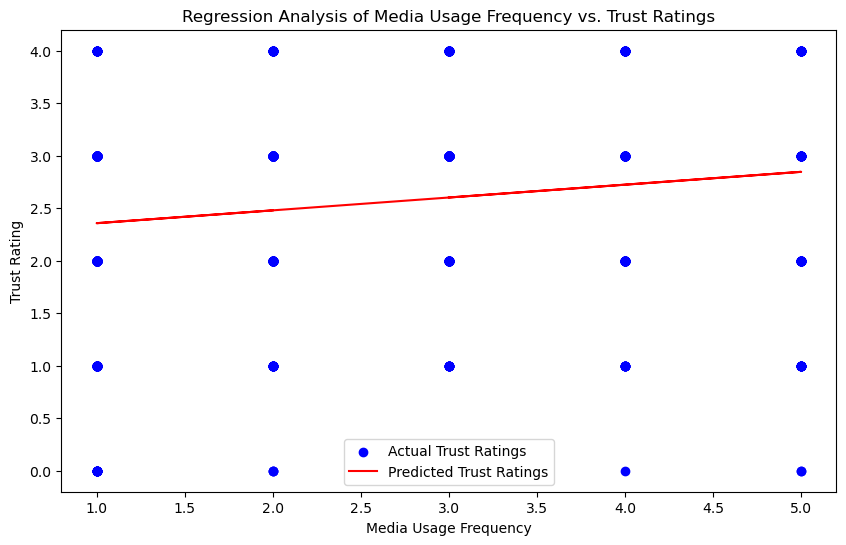

(array([0.12230944]), 2.2350752797853763)

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import re



df = pd.read_csv('Media Habits in the 21st Century_February 12, 2024_07.30.csv', skiprows=2)
original_columns = df.columns.tolist()


# Function to extract ImportId value from column name
def extract_import_id(col_name):
    match = re.search(r'"ImportId":"([^"]+)"', col_name)
    if match:
        return match.group(1)
    else:
        return col_name  


df.columns = [extract_import_id(col) for col in df.columns]


usage_columns = [col for col in df.columns if col.startswith('QID4_')]
trust_columns = [col for col in df.columns if col.startswith('QID5_')]


df[usage_columns + trust_columns].head()

trust_mapping = {
    "0 (not at all)": 0,
    "1 (unlikely)": 1,
    "2 (somtimes)": 2,  
    "3 (usually)": 3,
    "4 (always)": 4
}


for col in trust_columns:
    df[col] = df[col].map(trust_mapping)


df[trust_columns].head()



usage_data = []
trust_data = []

for index, row in df.iterrows():
    for i in range(1, 13):  
        usage_col = f'QID4_{i}'
        trust_col = f'QID5_{i}'
        if row[usage_col] > 0:  
            usage_data.append(row[usage_col])
            trust_data.append(row[trust_col])


import numpy as np

usage_array = np.array(usage_data)
trust_array = np.array(trust_data)


usage_array.shape, trust_array.shape
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


model = LinearRegression()


X = usage_array.reshape(-1, 1)  
y = trust_array  


model.fit(X, y)


predicted_y = model.predict(X)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Trust Ratings')
plt.plot(X, predicted_y, color='red', label='Predicted Trust Ratings')
plt.title('Regression Analysis of Media Usage Frequency vs. Trust Ratings')
plt.xlabel('Media Usage Frequency')
plt.ylabel('Trust Rating')
plt.legend()
plt.show()

# Displaying the model's coefficients
model.coef_, model.intercept_


In [4]:
from sklearn.linear_model import LinearRegression

# Identifying columns for social and traditional media
social_media_usage_cols = ['QID4_1', 'QID4_2', 'QID4_3', 'QID4_4', 'QID4_6']
social_media_trust_cols = ['QID5_1', 'QID5_2', 'QID5_3', 'QID5_4', 'QID5_6']

# Combining social media usage and trust data
social_media_usage = df[social_media_usage_cols].values.flatten()
social_media_trust = df[social_media_trust_cols].values.flatten()

# Filtering out entries where trust is NaN or usage is 0 (indicating non-use)
valid_social_media = ~np.isnan(social_media_trust) & (social_media_usage > 0)
social_media_usage_filtered = social_media_usage[valid_social_media]
social_media_trust_filtered = social_media_trust[valid_social_media]

# Traditional media columns are all usage and trust columns excluding those identified for social media
traditional_media_usage_cols = [col for col in usage_columns if col not in social_media_usage_cols]
traditional_media_trust_cols = [col for col in trust_columns if col not in social_media_trust_cols]

# Combining traditional media usage and trust data
traditional_media_usage = df[traditional_media_usage_cols].values.flatten()
traditional_media_trust = df[traditional_media_trust_cols].values.flatten()


valid_traditional_media = ~np.isnan(traditional_media_trust) & (traditional_media_usage > 0)
traditional_media_usage_filtered = traditional_media_usage[valid_traditional_media]
traditional_media_trust_filtered = traditional_media_trust[valid_traditional_media]


X_social = social_media_usage_filtered.reshape(-1, 1)
y_social = social_media_trust_filtered

X_traditional = traditional_media_usage_filtered.reshape(-1, 1)
y_traditional = traditional_media_trust_filtered


model_social = LinearRegression().fit(X_social, y_social)
social_r_squared = model_social.score(X_social, y_social)


model_traditional = LinearRegression().fit(X_traditional, y_traditional)
traditional_r_squared = model_traditional.score(X_traditional, y_traditional)

social_r_squared, traditional_r_squared


(0.1174941777030849, 0.13946913118297444)

In [5]:
# Correcting the approach for regression analysis based on the correct column names for trust in social and traditional media

# Updating the trust column lists based on the correct identification
social_media_trust_cols_corrected = ['QID5_1', 'QID5_2', 'QID5_3', 'QID5_4', 'QID5_6']  # Correct social media trust columns
traditional_media_trust_cols_corrected = ['QID5_5', 'QID5_7', 'QID5_8', 'QID5_9', 'QID5_10', 'QID5_11', 'QID5_12']  # Assuming these as traditional


df['avg_trust_social'] = df[social_media_trust_cols_corrected].mean(axis=1)
df['avg_trust_traditional'] = df[traditional_media_trust_cols_corrected].mean(axis=1)


df_regression = df[['avg_trust_social', 'avg_trust_traditional']].dropna()



X = np.concatenate([np.zeros(df_regression['avg_trust_social'].shape), np.ones(df_regression['avg_trust_traditional'].shape)])


Y = np.concatenate([df_regression['avg_trust_social'], df_regression['avg_trust_traditional']])


X = sm.add_constant(X)


model = sm.OLS(Y, X)
results = model.fit()


results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     206.9
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           8.15e-34
Time:                        12:05:46   Log-Likelihood:                -248.66
No. Observations:                 230   AIC:                             501.3
Df Residuals:                     228   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2470      0.067     18.664      0.000       1.115       1.379
x1             1.3590      0.094     14.384      0.000       1.173       1.545
==============================================================================
Omnibus:                       34.789   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.866
Skew:                          -0.859   Prob(JB):                     1.22e-12
Kurtosis:                       4.666   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

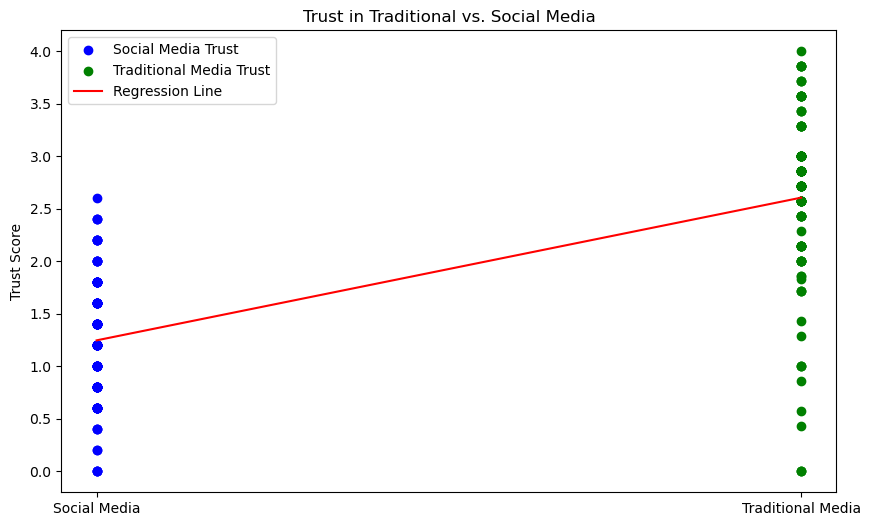

In [6]:
# Plotting the fit of the regression analysis comparing trust in traditional vs. social media

# Calculating the predicted trust scores based on the model
predicted_trust = results.predict(X)

# Extracting social and traditional media trust scores for plotting
social_trust_scores = df_regression['avg_trust_social']
traditional_trust_scores = df_regression['avg_trust_traditional']

# Plotting
plt.figure(figsize=(10, 6))

# Plotting actual trust scores for social and traditional media
plt.scatter(np.zeros(social_trust_scores.shape[0]), social_trust_scores, color='blue', label='Social Media Trust')
plt.scatter(np.ones(traditional_trust_scores.shape[0]), traditional_trust_scores, color='green', label='Traditional Media Trust')

# Plotting the regression line
plt.plot([0, 1], [predicted_trust[0], predicted_trust[-1]], color='red', label='Regression Line')

plt.xticks([0, 1], ['Social Media', 'Traditional Media'])
plt.ylabel('Trust Score')
plt.title('Trust in Traditional vs. Social Media')
plt.legend()
plt.show()
